# Testing out the function of l1 and l2 regularization 

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from functools import partial

## Loading dataset

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
x_valid, x_train = x_train_full[:5000] / 255, x_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255

In [4]:
pixel_mean = x_train.mean(axis = 0, keepdims = True)
pixel_std = x_train.std(axis = 0, keepdims = True)
x_train_scaled = (x_train - pixel_mean) / pixel_std
x_valid_scaled = (x_valid - pixel_mean) / pixel_std
x_test_scaled = (x_test - pixel_mean) / pixel_std

## l2 regularization

In [5]:
keras.backend.clear_session()

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = keras.activations.elu, kernel_initializer = keras.initializers.he_normal, kernel_regularizer = keras.regularizers.l2(0.01)))
model.add(keras.layers.Dense(100, activation = keras.activations.elu, kernel_initializer = keras.initializers.he_normal, kernel_regularizer = keras.regularizers.l2(0.01)))
model.add(keras.layers.Dense(10, activation = keras.activations.softmax, kernel_regularizer = keras.regularizers.l2(0.01)))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.Nadam(), metrics = 'accuracy')

In [9]:
history = model.fit(x_train_scaled, y_train, epochs = 5, validation_data = (x_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 5s 3ms/step - loss: 1.6180 - accuracy: 0.8115 - val_loss: 0.6995 - val_accuracy: 0.8380
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7192 - accuracy: 0.8264 - val_loss: 0.7182 - val_accuracy: 0.8254
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7010 - accuracy: 0.8329 - val_loss: 0.6793 - val_accuracy: 0.8508
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6945 - accuracy: 0.8366 - val_loss: 0.6929 - val_accuracy: 0.8432
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6924 - accuracy: 0.8371 - val_loss: 0.6772 - val_accuracy: 0.8428


In [10]:
df_metrics = pd.DataFrame(history.history)

(-1.0, 5.0, 0.6, 1.5)

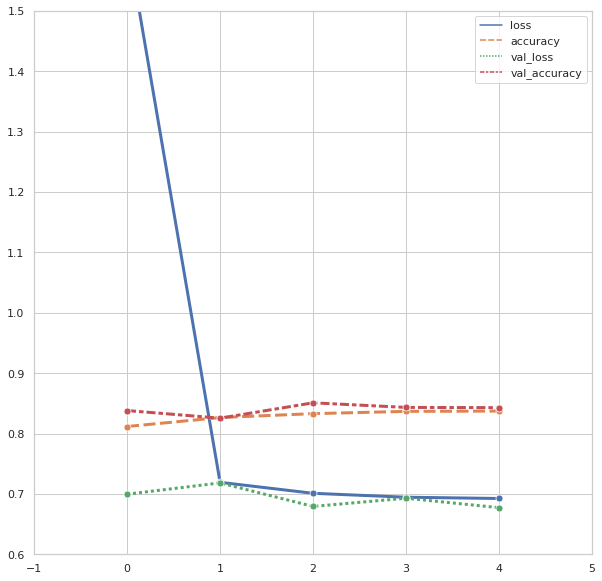

In [11]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 10))
sns.lineplot(data = df_metrics, linewidth = 3, marker = 'o', markersize = 7)
plt.axis([-1, 5, 0.6, 1.5])

- We will be using the same regularization for all the layers like in the cas of using the same activation funcs and initializers for all hidden layers.
- This will make the model building part look complicated. We can simplify it using the Partial from functools lib of python.

In [12]:
keras.backend.clear_session()

In [13]:
regularized_dense = partial(keras.layers.Dense, activation = keras.activations.elu, kernel_initializer = keras.initializers.he_normal, kernel_regularizer = keras.regularizers.l2(0.01))

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(regularized_dense(300))
model.add(regularized_dense(100))
model.add(regularized_dense(10, activation = keras.activations.softmax, kernel_initializer = keras.initializers.glorot_uniform))

In [15]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.Nadam(), metrics = 'accuracy')

In [16]:
history = model.fit(x_train_scaled, y_train, epochs = 5, validation_data = (x_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 5s 3ms/step - loss: 1.6122 - accuracy: 0.8125 - val_loss: 0.7362 - val_accuracy: 0.8326
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7191 - accuracy: 0.8275 - val_loss: 0.7022 - val_accuracy: 0.8374
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7007 - accuracy: 0.8332 - val_loss: 0.6816 - val_accuracy: 0.8428
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6940 - accuracy: 0.8341 - val_loss: 0.6972 - val_accuracy: 0.8334
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6904 - accuracy: 0.8369 - val_loss: 0.6821 - val_accuracy: 0.8410


In [17]:
df_metrics = pd.DataFrame(history.history)

(0.0, 4.0, 0.6, 1.0)

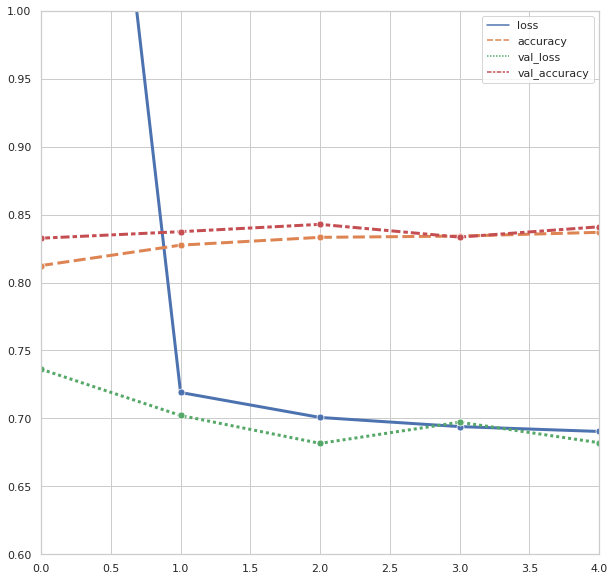

In [18]:
plt.figure(figsize = (10,10))
sns.lineplot(data = df_metrics, linewidth = 3, marker = 'o', markersize = 7)
plt.axis([0, 4, 0.6, 1])